In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [3]:
X = df['Text']
y = df['Category']

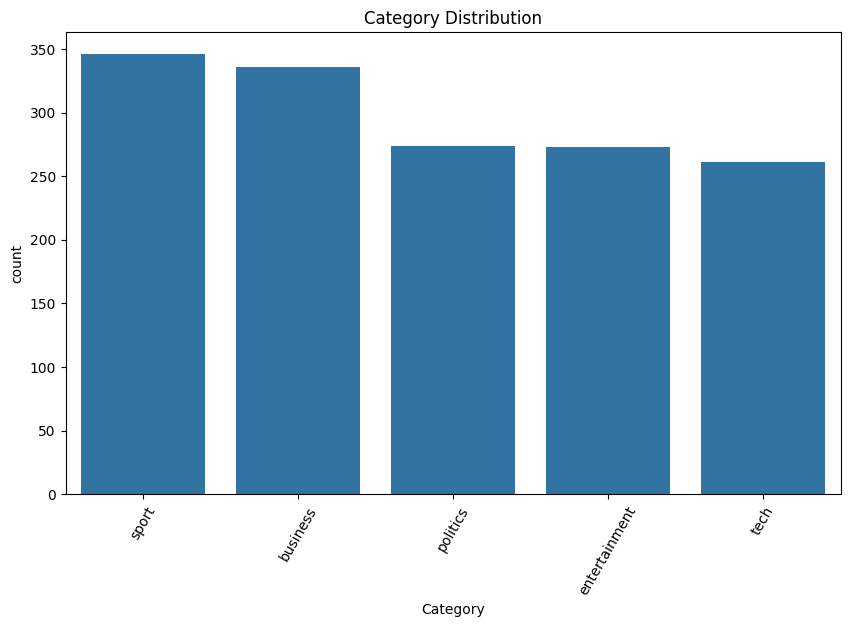

In [4]:
#Category Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'Category', order= df['Category'].value_counts().index)
plt.xticks(rotation=60)
plt.title('Category Distribution')
plt.show()

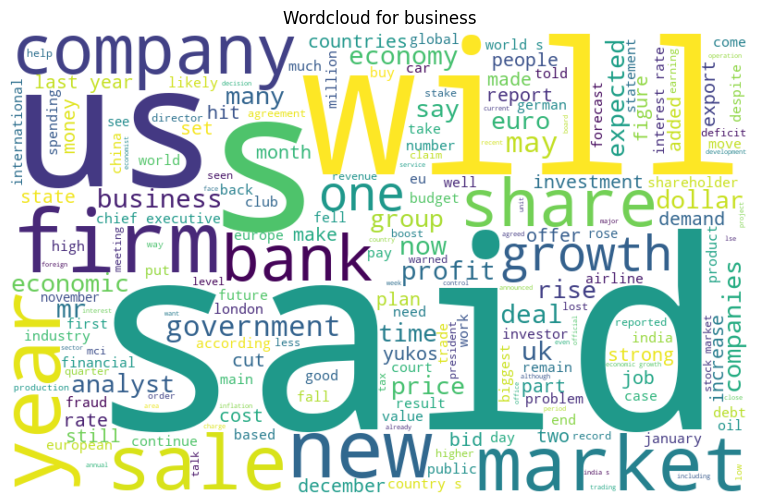

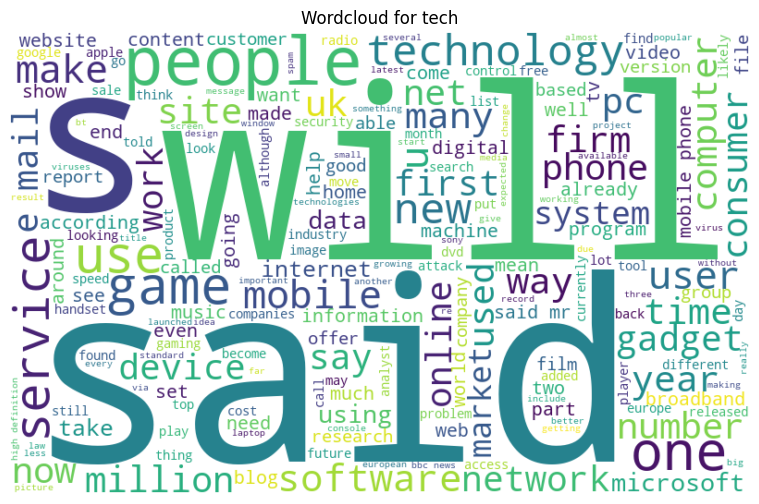

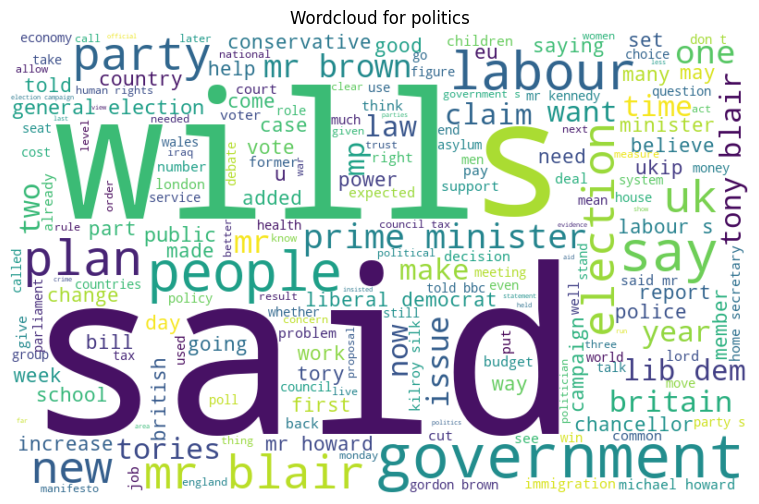

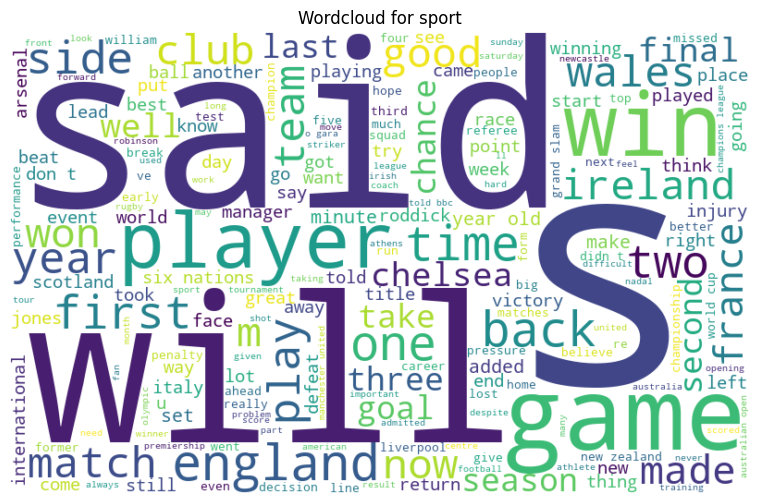

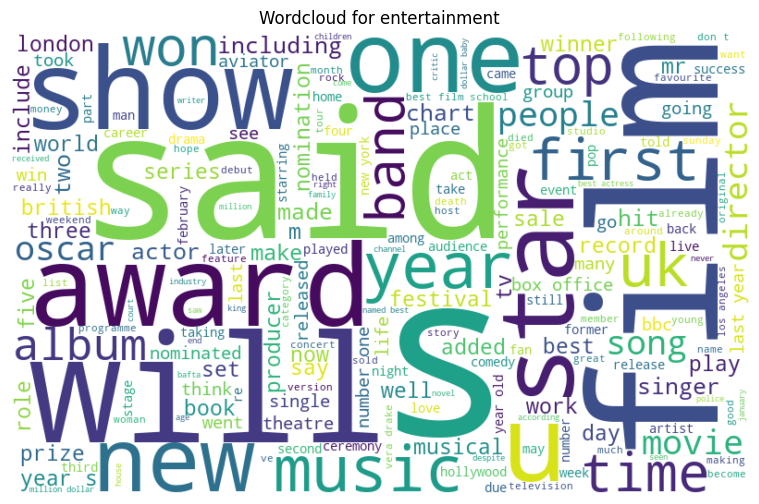

In [5]:
for category in df['Category'].unique():
    text = " ".join(df[df['Category']==category]['Text'].values)
    wordcloud = WordCloud(width=800, height=500,background_color='white').generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for {category}')
    plt.show()

In [14]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)

{'off', 'no', 'they', 'then', "shouldn't", 'm', 'needn', 'it', "isn't", 'a', 'be', "mightn't", "you've", 'during', 'does', 'until', 'yourself', 'will', 'but', 'the', 'ma', 'some', 'from', 'of', 'below', 'out', "don't", 'ain', 'you', 'them', "should've", 'aren', 'that', 'himself', 'ourselves', 'she', 'who', "you're", 'other', 'what', 's', 'only', 'and', 'with', 'under', 'here', 'herself', 'nor', 'haven', 'myself', 'more', 'or', 'each', 'our', 'i', "hasn't", 'against', 'before', 'few', 'we', "that'll", 'while', 'into', 'ours', 'didn', 'being', 'same', 'after', "won't", 'have', 'mustn', "weren't", 'about', 'has', 'doesn', 'doing', 'y', 'once', 'now', 'again', 'than', 'her', 'there', 'down', 'yours', "she's", 'just', "needn't", 'mightn', 'where', 'those', 'by', 'hadn', 't', "couldn't", "it's", 'hers', 'to', 'further', 'wouldn', 'him', 'at', 're', 'my', 'because', 'for', 'wasn', 'll', 'are', "you'll", 'their', "shan't", 'on', 'through', 'how', 'itself', 'having', 'an', 'as', 'o', 'yourselve

In [17]:
def preprocess_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word)
             for word in words if word not in stop_words]
    return " ".join(words)

df['Text'] = df['Text'].apply(preprocess_text)
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launch defence lawyer defendi...,business
1,154,german business confidence slide german busine...,business
2,1101,bbc poll indicates economic gloom citizen majo...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bos $168m payout eighteen former enron d...,business


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'), MultinomialNB())
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print('Naive Bayes Classification Report:')
print("Acccuracy:", accuracy_score(y_test, y_pred_nb))

print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
Acccuracy: 0.9563758389261745
               precision    recall  f1-score   support

     business       0.94      0.97      0.95        75
entertainment       1.00      0.96      0.98        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.90      0.94        58

     accuracy                           0.96       298
    macro avg       0.96      0.95      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [29]:
new_texts = [
    'This movie was incredible!',
    'The acting was amazing, but the plot was terrible.',
    'The football match was amazing.',
    'I disliked the acting in this movie.',
    'The government announced new tarriffs ahead of G20 summit.',
    'War is not.', 
]

y_pred_new = nb_model.predict(new_texts)

for text, prediction in zip(new_texts, y_pred_new):
    print(f'Text:{text}: Predicted Category:{prediction}')

Text:This movie was incredible!: Predicted Category:entertainment
Text:The acting was amazing, but the plot was terrible.: Predicted Category:entertainment
Text:The football match was amazing.: Predicted Category:sport
Text:I disliked the acting in this movie.: Predicted Category:entertainment
Text:The government announced new tarriffs ahead of G20 summit.: Predicted Category:politics
Text:War is not.: Predicted Category:politics


In [31]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)  # Encode training labels
y_test_enc = label_encoder.transform(y_test)        # Encode test labels

# Define the pipeline with XGBoost
xgb_model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', XGBClassifier(use_label_encoder=True, eval_metric='logloss'))
])

# Train the XGBoost model
xgb_model.fit(X_train, y_train_enc)

# Make predictions
y_pred_xgb_enc = xgb_model.predict(X_test)

# Decode predictions back to original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_enc)

# Print evaluation metrics
print('XGBoost Classification Report:')
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
Accuracy: 0.9463087248322147
               precision    recall  f1-score   support

     business       0.93      0.92      0.93        75
entertainment       0.96      0.93      0.95        46
     politics       0.92      0.96      0.94        56
        sport       0.97      0.98      0.98        63
         tech       0.96      0.93      0.95        58

     accuracy                           0.95       298
    macro avg       0.95      0.95      0.95       298
 weighted avg       0.95      0.95      0.95       298

